In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

<Axes: >

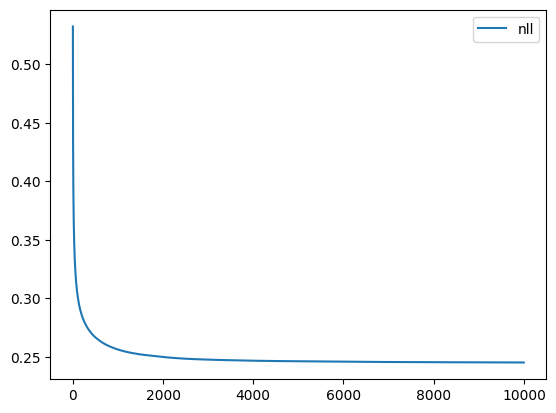

In [2]:
with open("result.txt") as f:
    lines = f.readlines()
    lines = lines[:-1]

list_iter = []
list_nll = []
list_diff = []
list_num_coef = []

for line in lines:
    if line[0] == '[':
        continue
    l = line.strip()
    it = l.split("\t")
    list_iter.append(int(it[0]))
    
    nll, diff, num_coef = it[1].split(", ")
    nll = -float(nll[1:])
    diff = float(diff)
    num_coef = int(float(num_coef[:-1]))

    list_nll.append(nll)
    list_diff.append(diff)
    list_num_coef.append(num_coef)

df_log = pd.DataFrame(data=[list_iter, list_nll, list_diff, list_num_coef]).T
df_log.columns=["iter", "nll", "diff", "num_coef"]

df_log.nll.plot(label="nll", legend=True)
# df_log.num_coef.plot(label="selection", legend=True, secondary_y=True)
# fig = plt.figure()
# ax = fig.add_subplot(111)
# # pred: x (blue bar), true: y (red bar)
# plt.yscale('log')
# ax.plot(range(df_log.shape[0]), -df_log['nll'])
# ax.plot(range(df_log.shape[0]), df_log['num_coef'])
# plt.show()

In [2]:
target_dir = "1.0e-6_max_steps_1000000_validation_step_1000"

logs = []
for filename in sorted(os.listdir(target_dir)):
    if filename.startswith("loss"):
        with open(os.path.join(target_dir, filename)) as f:
            lines = f.readlines()
            lines = lines[:-1]
            logs.extend(lines)

In [3]:
list_iter = []
list_nll = []
list_diff = []
list_num_coef = []

for line in logs:
    l = line.strip()
    it = l.split(" ")
    list_iter.append(int(it[0]))
    
    nll = it[-3][1:-1]
    diff = it[-2][:-1]
    num_coef = it[-1][:-1]
    nll = float(nll)
    diff = float(diff)
    num_coef = int(float(num_coef))

    list_nll.append(nll)
    list_diff.append(diff)
    list_num_coef.append(num_coef)

In [4]:
df_log = pd.DataFrame(data=[list_iter, list_nll, list_diff, list_num_coef]).T
df_log.columns=["iter", "nll", "diff", "num_coef"]
df_log

,iter,nll,diff,num_coef
0,1000.0,-0.731303,7.813984e-06,3556.0
1,2000.0,-0.719536,6.062841e-06,3027.0
2,3000.0,-0.709959,5.167201e-06,2595.0
3,4000.0,-0.701693,4.561284e-06,2349.0
4,5000.0,-0.694370,4.082989e-06,2213.0
...,...,...,...,...
490,95000.0,-0.486942,2.006899e-08,296.0
491,96000.0,-0.486912,1.996300e-08,296.0
492,97000.0,-0.486883,1.985820e-08,296.0
493,98000.0,-0.486853,2.009941e-08,295.0


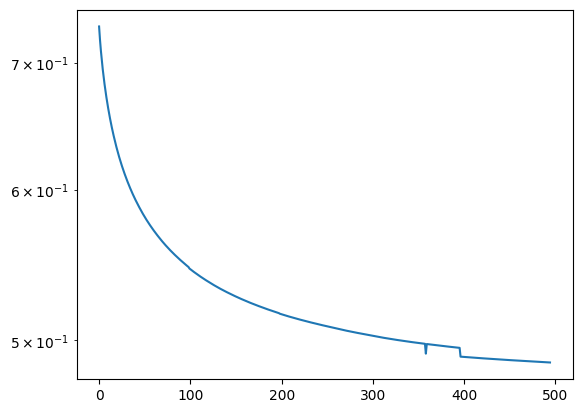

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)
# pred: x (blue bar), true: y (red bar)
plt.yscale('log')
ax.plot(range(df_log.shape[0]), -df_log['nll'])
plt.show()

In [6]:
with open("loss_1.8e-8_100.txt") as f:
    lines = f.readlines()
    lines = lines[:-1]

list_iter = []
list_nll = []
list_diff = []
list_num_coef = []

for line in lines:
    l = line.strip()
    it = l.split("\t")
    list_iter.append(int(it[0]))
    
    nll, diff, num_coef = it[1].split(", ")
    nll = float(nll[1:])
    diff = float(diff)
    num_coef = int(float(num_coef[:-1]))

    list_nll.append(nll)
    list_diff.append(diff)
    list_num_coef.append(num_coef)

df_log = pd.DataFrame(data=[list_iter, list_nll, list_diff, list_num_coef]).T
df_log.columns=["iter", "nll", "diff", "num_coef"]
df_log

,iter,nll,diff,num_coef
0,10000.0,-0.748466,inf,620.0
1,20000.0,-0.747836,0.000360,612.0
2,30000.0,-0.747225,0.000350,606.0
3,40000.0,-0.746630,0.000340,595.0
4,50000.0,-0.746052,0.000331,580.0
...,...,...,...,...
95,960000.0,-0.716682,0.000121,333.0
96,970000.0,-0.716475,0.000121,330.0
97,980000.0,-0.716269,0.000120,330.0
98,990000.0,-0.716064,0.000119,329.0


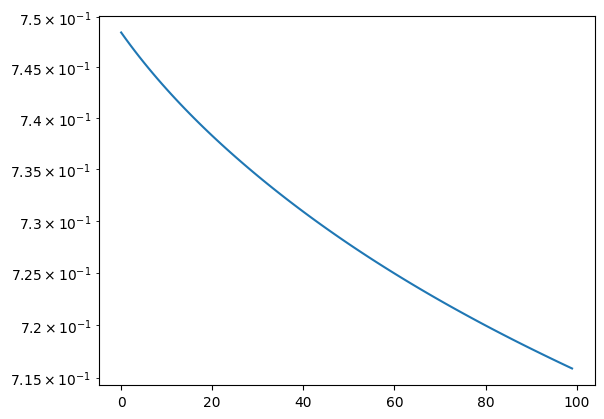

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
# pred: x (blue bar), true: y (red bar)
plt.yscale('log')
ax.plot(range(df_log.shape[0]), -df_log['nll'])
plt.show()

![](liver-cancer-lasso.png)